Import libraries

In [2]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import ast
import seaborn as sns

In [3]:
pd.set_option("display.max_columns", None)

Read in dataframe

In [4]:
df = pd.read_csv("franchises_combined_by_year.csv", index_col = 0)

In [5]:
df.sample()

,franchise_name,franchise_id,type,tconst,title,year,is_adult,runtime,genres,votes_average,rating_average,franchise_count,content_per_year,year_diff,vote_diff,rating_diff,num_of_releases_diff,z_rating,z_votes
1365,Top Gun,3025-1660,game,tt0303153,Top Gun,1987,0,NaN,"["" 'Action'"", ""['Vehicular Combat'"", "" 'Shoote...",244.0,5.2,5.0,1.0,NaN,NaN,NaN,NaN,-1.765145,-0.155693


This gets the first and last year of the franchise, creates columns and then gives the relative position of each release in the franchise as a percentage

In [6]:
df = df.groupby('franchise_id').agg(min_year=('year', 'min'), max_year=('year', 'max')) \
       .reset_index() \
       .merge(df, on='franchise_id', how='right') \
       .assign(position_in_franchise=lambda x: (x['year'] - x['min_year']) / (x['max_year'] - x['min_year']) * 100)


This gets the highest and lowest vote of the franchise and creates columns

In [7]:
df = df.groupby('franchise_id').agg(min_vote=('votes_average', 'min'), max_vote=('votes_average', 'max')) \
       .reset_index() \
       .merge(df, on='franchise_id', how='right')


This gets the highest and lowest rating of the franchise and creates columns

In [8]:
df = df.groupby('franchise_id').agg(min_rating=('rating_average', 'min'), max_rating=('rating_average', 'max')) \
       .reset_index() \
       .merge(df, on='franchise_id', how='right')


Find the biggest gap in releases for each franchise

In [9]:
df = df.groupby('franchise_id').agg(biggest_gap_in_releases=('year_diff', 'max')) \
       .reset_index() \
       .merge(df, on='franchise_id', how='left')

In [23]:
df.sample()

,franchise_id,biggest_gap_in_releases,min_rating,max_rating,min_vote,max_vote,min_year,max_year,franchise_name,type,tconst,title,year,is_adult,runtime,genres,votes_average,rating_average,franchise_count,content_per_year,year_diff,vote_diff,rating_diff,num_of_releases_diff,z_rating,z_votes,position_in_franchise
2777,3025-2633,8.0,6.9,8.5,188.0,2075.0,1995,2014,Yoshi's Island,game,tt3089966,Yoshi's New Island,2014,0,NaN,"["" 'Fantasy']"", "" 'Platformer'"", ""['Adventure'""]",845.0,7.2,4.0,1.0,8.0,657.0,0.3,0.0,0.092441,0.099155,100.0


We can see how long the average franchise runs for:

[Text(0.5, 1.0, 'Total franchise distribution'),
 Text(0.5, 0, 'Number of releases in the franchise'),
 Text(0, 0.5, 'Total franchises')]

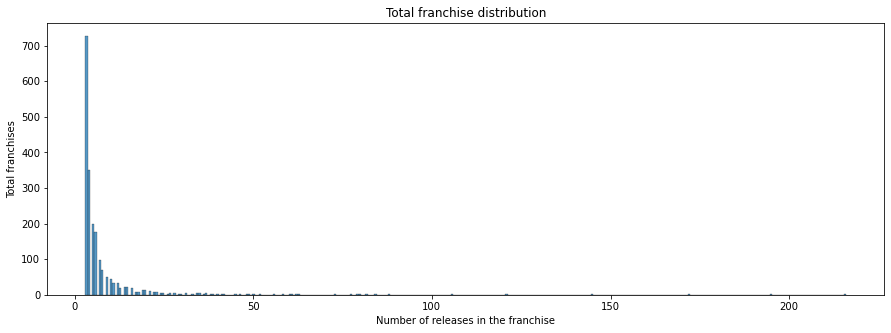

In [56]:
plt.figure(figsize=(15, 5))
sns.histplot(data = df.groupby('franchise_id')['franchise_count'].first().reset_index(), \
             x='franchise_count').set(title = 'Total franchise distribution', xlabel = 'Number of releases in the franchise', ylabel = "Total franchises")

That's pretty unclear so we can divide the data to make it clearer.

[Text(0.5, 1.0, 'Total franchise distribution'),
 Text(0.5, 0, 'Number of releases in the franchise'),
 Text(0, 0.5, 'Total franchises')]

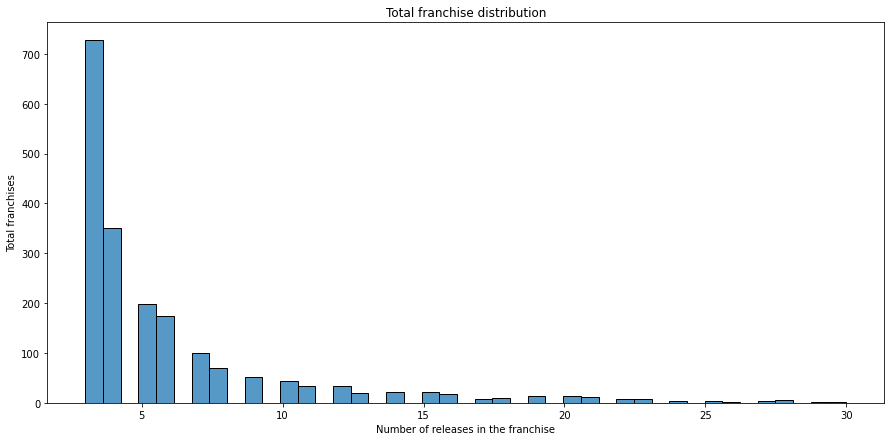

In [91]:
plt.figure(figsize=(15, 7))
sns.histplot(data = df[df['franchise_count'] <= 30].groupby('franchise_id')['franchise_count'].first().reset_index(), \
             x='franchise_count').set(title = 'Total franchise distribution', xlabel = 'Number of releases in the franchise', ylabel = "Total franchises")

<AxesSubplot:xlabel='year'>

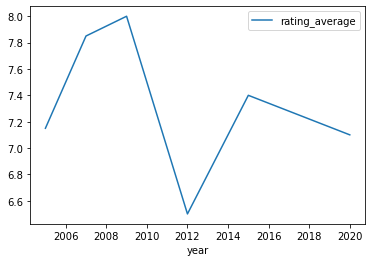

In [24]:
df[df['franchise_id'] == '3025-1403'].plot("year", "rating_average")

<AxesSubplot:xlabel='year', ylabel='rating_diff'>

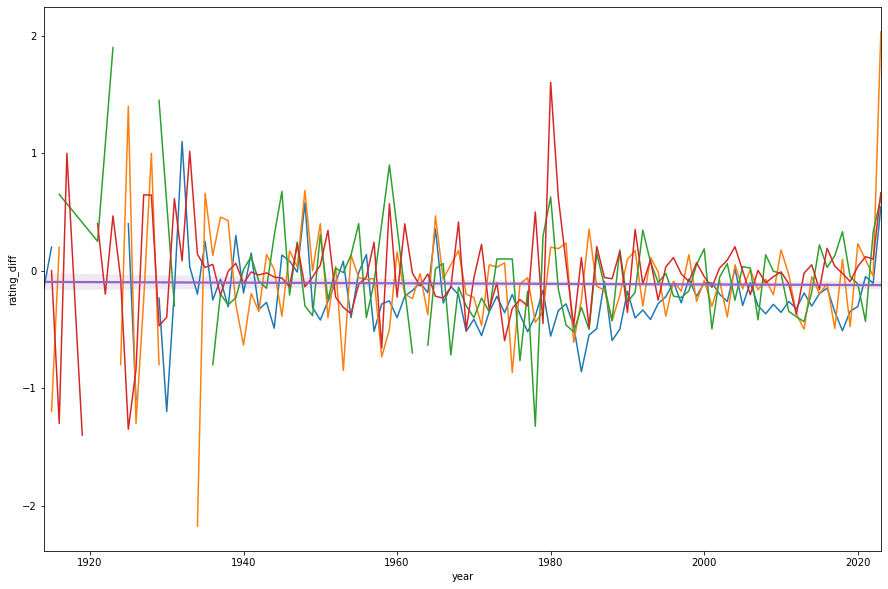

In [25]:
plt.figure(figsize=(15,10))
df[df['franchise_count'] < 6].groupby('year')['rating_diff'].mean().plot(label='Franchise Count = 6')
df[(df['franchise_count'] >= 6) & (df['franchise_count'] < 9)].groupby('year')['rating_diff'].mean().plot(label='Franchise Count = 22')
df[(df['franchise_count'] >= 9) & (df['franchise_count'] < 12)].groupby('year')['rating_diff'].mean().plot(label='Franchise Count = 22')
df[df['franchise_count'] >= 12].groupby('year')['rating_diff'].mean().plot(label='Franchise Count = 22')
sns.regplot(data=df, x='year', y='rating_diff', order=1, scatter=False)

#df[df['franchise_count'] == 8].groupby('year')['rating_diff'].mean().plot(label='Franchise Count = 8')
#df[df['franchise_count'] == 7].groupby('year')['rating_diff'].mean().plot(label='Franchise Count = 7')
#df[df['franchise_count'] == 6].groupby('year')['rating_diff'].mean().plot(label='Franchise Count = 6')
#df[df['franchise_count'] == 5].groupby('year')['rating_diff'].mean().plot(label='Franchise Count = 8')
#df[df['franchise_count'] == 4].groupby('year')['rating_diff'].mean().plot(label='Franchise Count = 7')


<AxesSubplot:xlabel='year', ylabel='rating_average'>

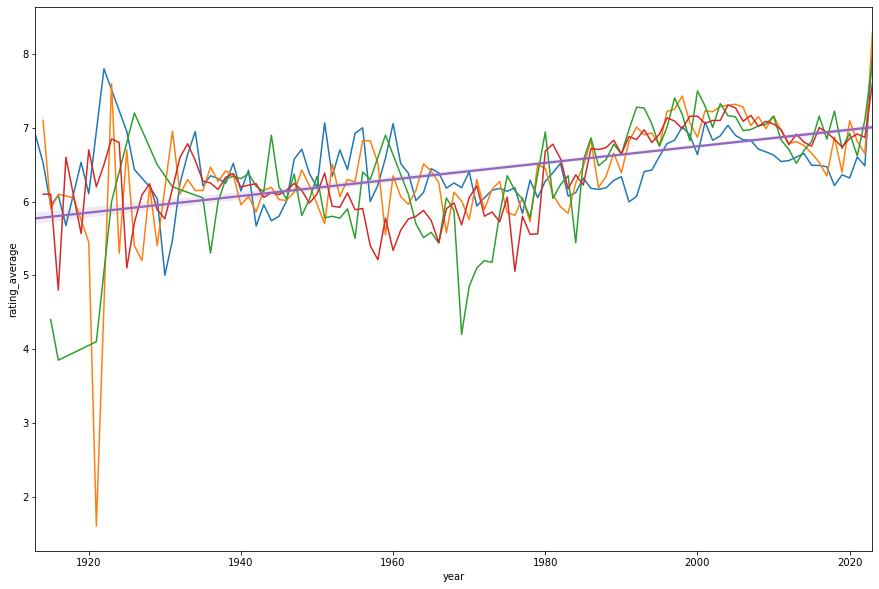

In [26]:
plt.figure(figsize=(15,10))
df[df['franchise_count'] < 6].groupby('year')['rating_average'].mean().plot(label='Franchise Count = 6')
df[(df['franchise_count'] >= 6) & (df['franchise_count'] < 9)].groupby('year')['rating_average'].mean().plot(label='Franchise Count = 22')
df[(df['franchise_count'] >= 9) & (df['franchise_count'] < 12)].groupby('year')['rating_average'].mean().plot(label='Franchise Count = 22')
df[df['franchise_count'] >= 12].groupby('year')['rating_average'].mean().plot(label='Franchise Count = 22')
sns.regplot(data=df, x='year', y='rating_average', order=1, scatter=False)


<AxesSubplot:xlabel='year'>

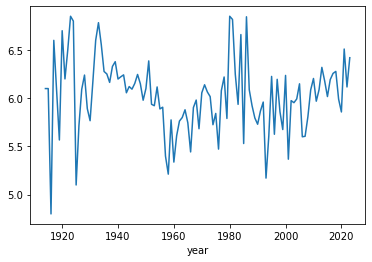

In [27]:
df[(df['type'] == "movie")&(df['franchise_count'] >= 12)].groupby('year')['rating_average'].mean().plot(label='Franchise Count = 22')

<AxesSubplot:xlabel='year', ylabel='rating_average'>

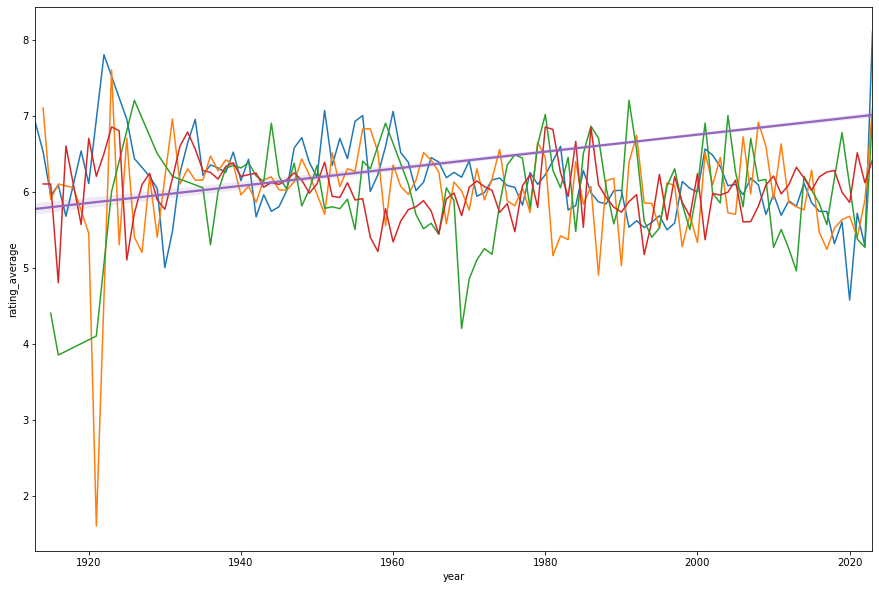

In [28]:
plt.figure(figsize=(15,10))
df[(df['type'] == "movie")&(df['franchise_count'] < 6)].groupby('year')['rating_average'].mean().plot(label='Franchise Count = 6')
df[(df['type'] == "movie")&(df['franchise_count'] >= 6) & (df['franchise_count'] < 9)].groupby('year')['rating_average'].mean().plot(label='Franchise Count = 22')
df[(df['type'] == "movie")&(df['franchise_count'] >= 9) & (df['franchise_count'] < 12)].groupby('year')['rating_average'].mean().plot(label='Franchise Count = 22')
df[(df['type'] == "movie")&(df['franchise_count'] >= 12)].groupby('year')['rating_average'].mean().plot(label='Franchise Count = 22')
sns.regplot(data=df, x='year', y='rating_average', order=1, scatter=False)


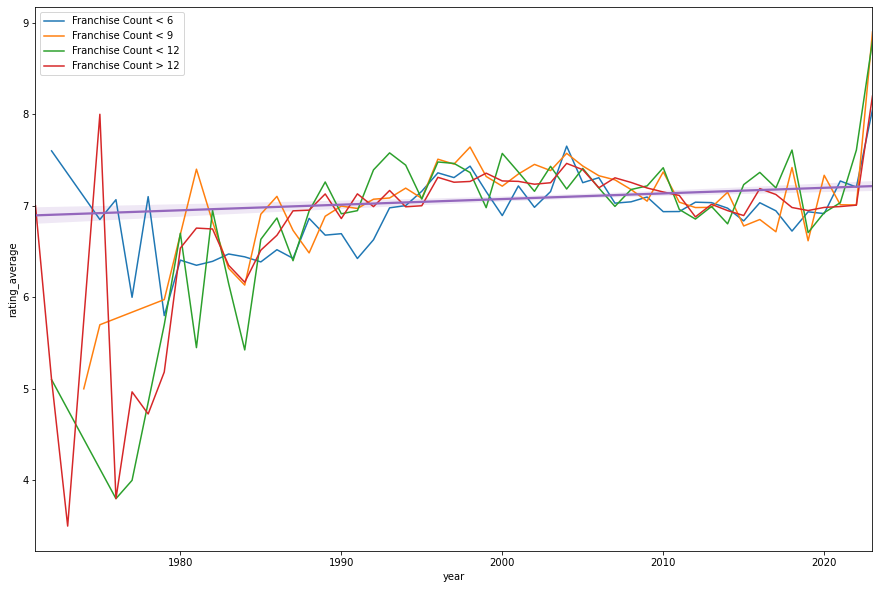

In [29]:
plt.figure(figsize=(15,10))
df[(df['type'] == "game")&(df['franchise_count'] < 6)].groupby('year')['rating_average'].mean().plot(label='Franchise Count < 6')
df[(df['type'] == "game")&(df['franchise_count'] >= 6) & (df['franchise_count'] < 9)].groupby('year')['rating_average'].mean().plot(label='Franchise Count < 9')
df[(df['type'] == "game")&(df['franchise_count'] >= 9) & (df['franchise_count'] < 12)].groupby('year')['rating_average'].mean().plot(label='Franchise Count < 12')
df[(df['type'] == "game")&(df['franchise_count'] >= 12)].groupby('year')['rating_average'].mean().plot(label='Franchise Count > 12')
sns.regplot(data=(df[df['type'] == "game"]), x='year', y='rating_average', order=1, scatter=False)
plt.legend()

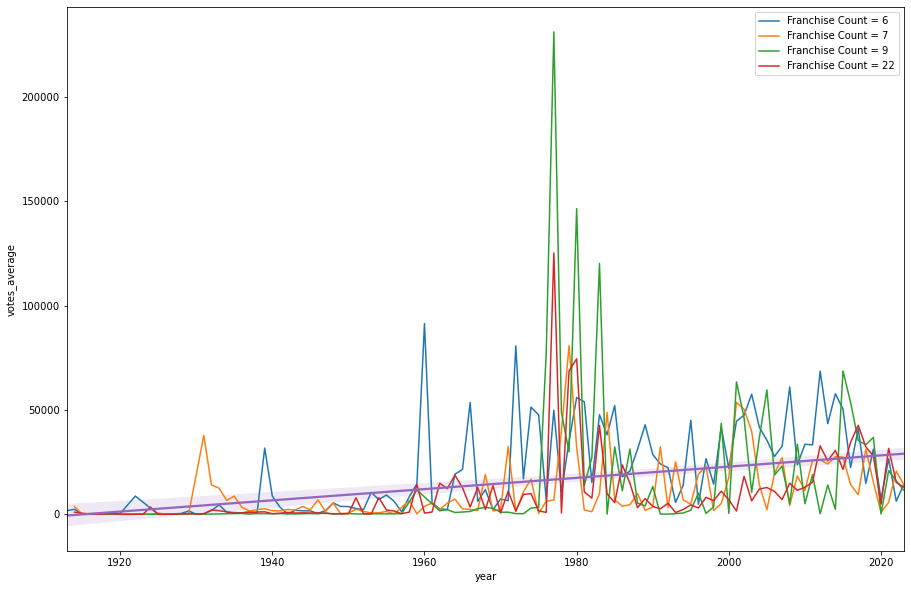

In [30]:
plt.figure(figsize=(15,10))
df[df['franchise_count'] < 6].groupby('year')['votes_average'].mean().plot(label='Franchise Count = 6')
df[(df['franchise_count'] >= 6) & (df['franchise_count'] < 9)].groupby('year')['votes_average'].mean().plot(label='Franchise Count = 7')
df[(df['franchise_count'] >= 9) & (df['franchise_count'] < 12)].groupby('year')['votes_average'].mean().plot(label='Franchise Count = 9')
df[df['franchise_count'] >= 12].groupby('year')['votes_average'].mean().plot(label='Franchise Count = 22')
sns.regplot(data=df, x='year', y='votes_average', order=1, scatter=False)
plt.legend()

<AxesSubplot:xlabel='biggest_gap_in_releases', ylabel='rating_average'>

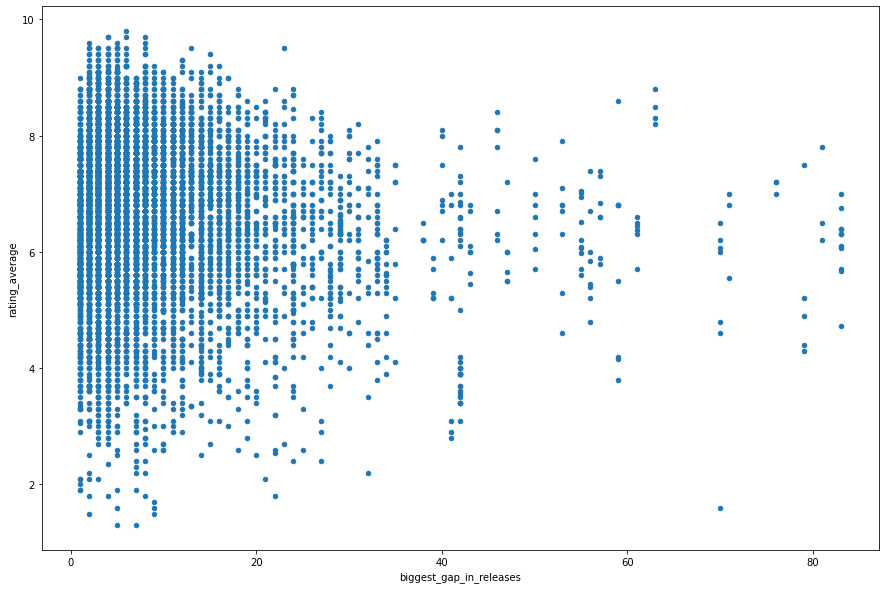

In [33]:
df.plot.scatter("biggest_gap_in_releases", "rating_average", figsize = (15,10))

In [35]:
df.sample()

,franchise_id,biggest_gap_in_releases,min_rating,max_rating,min_vote,max_vote,min_year,max_year,franchise_name,type,tconst,title,year,is_adult,runtime,genres,votes_average,rating_average,franchise_count,content_per_year,year_diff,vote_diff,rating_diff,num_of_releases_diff,z_rating,z_votes,position_in_franchise
3558,3025-332,10.0,5.85,8.2,33.5,803.0,1989,2022,Teenage Mutant Ninja Turtles,game,"tt4224442, tt5558512","Teenage Mutant Ninja Turtles, Teenage Mutant N...",2014,0,NaN,"["" 'Action'"", "" 'Action-Adventure']"", "" 'Pinba...",33.5,5.85,27.0,2.0,1.0,-20.166667,-0.583333,-1.0,-1.161429,-0.244954,75.757576


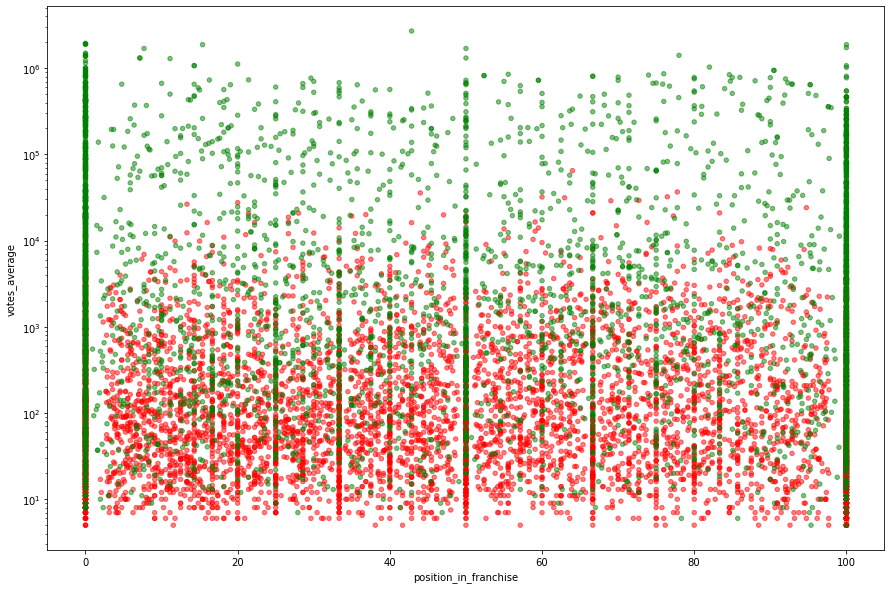

In [42]:
df.plot.scatter("position_in_franchise", "votes_average", c=df['type'].map({'movie': 'green', 'game': 'red'}), alpha = 0.5, figsize = (15,10))
plt.yscale('log', base=10)

<AxesSubplot:xlabel='position_in_franchise', ylabel='rating_average'>

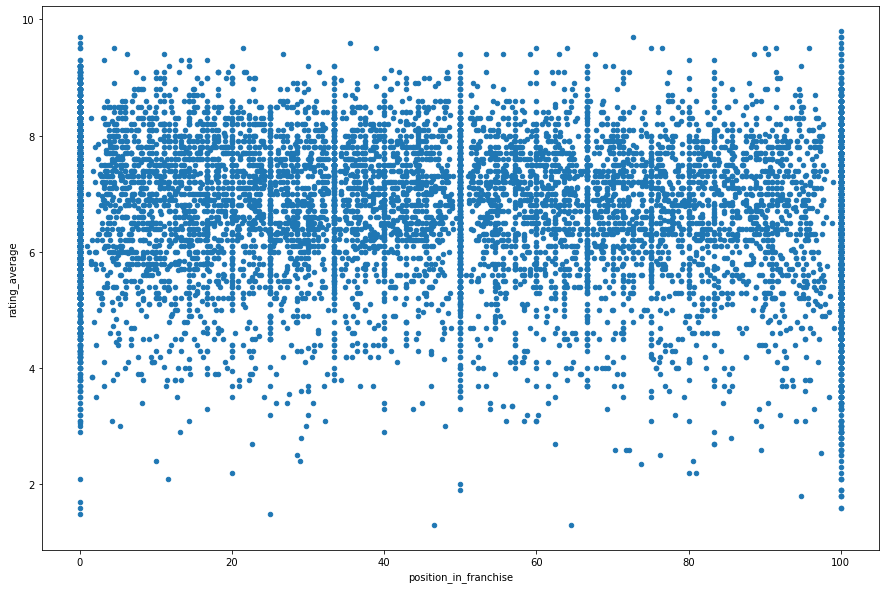

In [36]:
df.plot.scatter("position_in_franchise", "rating_average", figsize = (15,10))

In [41]:
df.sample()

,franchise_id,biggest_gap_in_releases,min_rating,max_rating,min_vote,max_vote,min_year,max_year,franchise_name,type,tconst,title,year,is_adult,runtime,genres,votes_average,rating_average,franchise_count,content_per_year,year_diff,vote_diff,rating_diff,num_of_releases_diff,z_rating,z_votes,position_in_franchise
4984,3025-4871,1.0,6.7,7.0,55.0,84.0,1995,1997,Donkey Kong Land,game,tt1340818,Donkey Kong Land III,1997,0,NaN,"["" 'Action'"", "" 'Fantasy']"", "" 'Platformer'"", ...",55.0,6.9,3.0,1.0,1.0,-18.0,-0.1,0.0,-0.186196,-0.235837,100.0


We can get a count for the number of franchises in our dataset, and how many of these are games vs movies

In [44]:
print("Unique franchise ids: ", df.franchise_id.nunique(),
      "\nMovie franchises: ", df[df["type"]=="movie"].franchise_id.nunique(), 
      "\nGame franchises: ", df[df["type"]=="game"].franchise_id.nunique())

Unique franchise ids:  2014 
Movie franchises:  857 
Game franchises:  1157


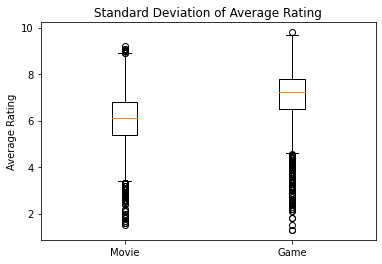

In [45]:
fig, ax = plt.subplots()
ax.boxplot([df[df['type'] == 'movie']['rating_average'], df[df['type'] == "game"]['rating_average']])
ax.set_xticklabels(['Movie', 'Game'])
ax.set_ylabel('Average Rating')
ax.set_title('Standard Deviation of Average Rating')
plt.show()

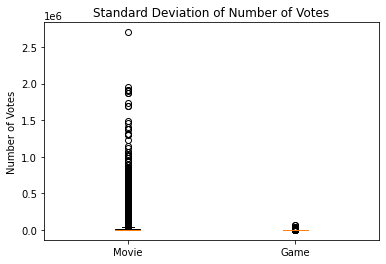

In [46]:
fig, ax = plt.subplots()
ax.boxplot([df[df['type'] == 'movie']['votes_average'], df[df['type'] == "game"]['votes_average']])
ax.set_xticklabels(['Movie', 'Game'])
ax.set_ylabel('Number of Votes')
ax.set_title('Standard Deviation of Number of Votes')
plt.show()

In [47]:
df[df['type'] == "game"]['votes_average'].describe()

count     7305.000000
mean       611.166027
std       2358.429140
min          5.000000
25%         27.000000
50%         80.000000
75%        320.000000
max      69750.000000
Name: votes_average, dtype: float64

In [48]:
df[df['type'] == "movie"]['votes_average'].describe()

count    4.078000e+03
mean     6.025842e+04
std      1.818602e+05
min      5.000000e+00
25%      2.670000e+02
50%      1.688000e+03
75%      1.844825e+04
max      2.700528e+06
Name: votes_average, dtype: float64

We can look at the number of releases each franchise has

In [49]:
bins =[2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 12.5, 15.5, 20.5, 250]
df['franchise_count_bin'] = pd.cut(df['franchise_count'], bins=bins, labels=["3", "4", "5", "6", "7", "8", "9", "10-12", "13-15", "16-20", "20+"])

<AxesSubplot:xlabel='Number of releases', ylabel='Number of franchises'>

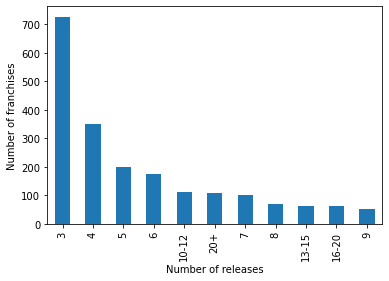

In [50]:
df.groupby('franchise_id')['franchise_count_bin'].first().value_counts().reset_index().plot(
    kind='bar', x='index', y='franchise_count_bin', xlabel = "Number of releases", ylabel = "Number of franchises", legend=False)

## Note:

This is taking me too long. All I want to do is sort the bins so they go in order but it's taking too long to try to figure out so I'll come back to it

Now I want to see whether the average rating for a franchise as a whole is affected by the number of elements in the franchise. I was going to just get an average based on the grouped years, but have realised that this will result in skewed data. Because we have already got an average for the year, we potentially have changed the weighting of certain movies, so if we try to get an average when we have already averaged some of them, it's going to create problems. Therefore I need to instead use the dataframe where the years were not merged.

In [62]:
df_unmerged = pd.read_csv("franchises_complete_dataframe.csv", index_col = 0)
df_unmerged.tconst.count()

D:\Programs\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,2,7,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


307320

In [52]:
df_unmerged.sample()

,franchise_name,franchise_id,tconst,title,year,is_adult,runtime,genres,rating,votes,type,game_id,best_fit_ratio,developers,platforms,publishers,age_rating,franchise_count
131264,NaN,NaN,tt0423217,smazalnia story,1985,0,82,['Comedy'],5.7,53.0,movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
df_unmerged = df_unmerged.groupby('franchise_id').agg(average_vote_franchise=('votes', 'mean'), average_rating_franchise=('rating', 'mean')) \
       .reset_index() \
       .merge(df_unmerged, on='franchise_id', how='right')

In [64]:
df_unmerged = df_unmerged.groupby('franchise_id').agg(min_year=('year', 'min'), max_year=('year', 'max')) \
       .reset_index() \
       .merge(df_unmerged, on='franchise_id', how='right') \
       .assign(position_in_franchise=lambda x: (x['year'] - x['min_year']) / (x['max_year'] - x['min_year']) * 100)


In [65]:
df_unmerged["Vote_relative_to_franchise_average"] = df_unmerged.apply(lambda row: (row["votes"] / row["average_vote_franchise"]) * 100, axis=1)

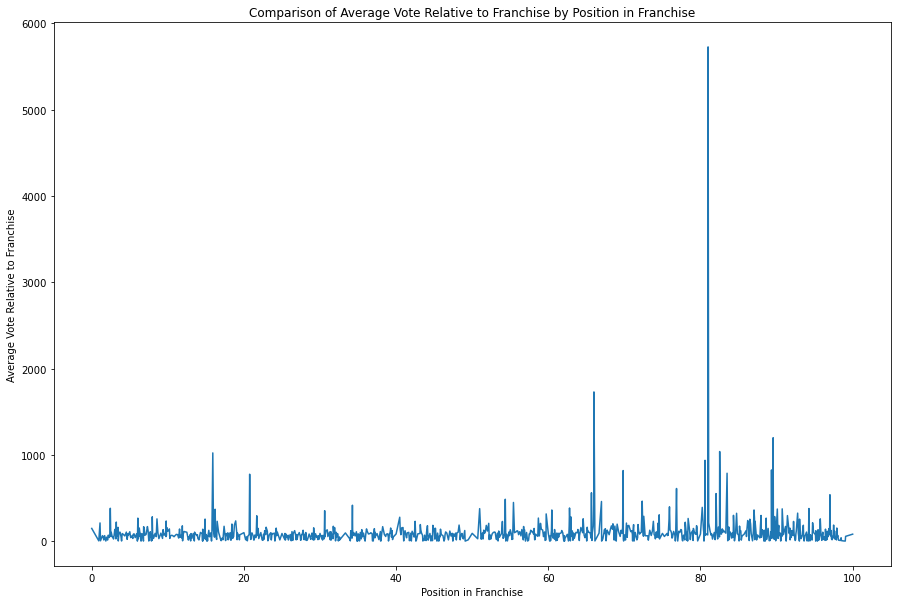

In [66]:
df_unmerged.groupby('position_in_franchise')['Vote_relative_to_franchise_average'].mean().plot(kind='line', figsize=(15,10))
plt.xlabel('Position in Franchise')
plt.ylabel('Average Vote Relative to Franchise')
plt.title('Comparison of Average Vote Relative to Franchise by Position in Franchise')
plt.show()

<AxesSubplot:xlabel='position_in_franchise', ylabel='Vote_relative_to_franchise_average'>

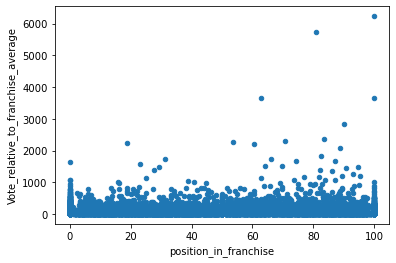

In [67]:
df_unmerged.plot.scatter("position_in_franchise", "Vote_relative_to_franchise_average")

## NEW DATAFRAME
Create a new dataframe with 1 entry per franchise. 

In [68]:
new_df = df_unmerged.sort_values('year').groupby('franchise_id').agg({
    'franchise_name' : 'first',
    'type': 'first',
    'rating': 'mean',
    'votes': 'mean',
    'franchise_count': 'first',
    'year': ['first', 'last']
})

In [73]:
new_df.sample()

,franchise_name,type,rating,votes,franchise_count,first_year,last_year,franchise_length
franchise_id,,,,,,,,
f80,Hercules,movie,4.693333,832.466667,15.0,1958,1964,7


In [75]:
new_df[new_df['franchise_count'] == 25]

,franchise_name,type,rating,votes,franchise_count,first_year,last_year,franchise_length
franchise_id,,,,,,,,
3025-1022,Forgotten Realms,game,7.372,351.64,25.0,1988,2013,26
3025-282,The Sims,game,7.096,448.96,25.0,2000,2018,19
f1301,Bulldog Drummond,movie,5.940,447.72,25.0,1922,1969,48
f1307,James Bond,movie,6.852,219391.96,25.0,1962,2021,60


In [70]:
def split_year(row):
    row['first_year'] = int(row['year']['first'])
    row['last_year'] = int(row['year']['last'])
    return row

new_df = new_df.apply(split_year, axis=1)
new_df = new_df[['franchise_name', 'type', 'rating', 'votes', 'franchise_count', 'first_year', 'last_year']]


In [71]:
new_df["franchise_length"] = new_df.apply(lambda row: row["last_year"] - row["first_year"] +1, axis = 1)

In [72]:
new_df.columns = new_df.columns.get_level_values(0)

In [63]:
new_df["franchise_length"].describe()


count    2014.000000
mean       16.173287
std        14.450913
min         1.000000
25%         6.000000
50%        12.000000
75%        22.000000
max       109.000000
Name: franchise_length, dtype: float64

In [64]:
new_df["frequency_of_releases"] = new_df.apply(lambda row: row["franchise_count"] / row["franchise_length"], axis = 1)

In [65]:
new_df[new_df['type']== 'game'].frequency_of_releases.describe()

count    1157.000000
mean        0.613475
std         0.506560
min         0.069767
25%         0.300000
50%         0.500000
75%         0.750000
max         5.000000
Name: frequency_of_releases, dtype: float64

In [66]:
new_df[new_df['type']== 'movie'].frequency_of_releases.describe()

count    857.000000
mean       0.676665
std        0.804700
min        0.031579
25%        0.235294
50%        0.428571
75%        0.777778
max        6.000000
Name: frequency_of_releases, dtype: float64

<AxesSubplot:xlabel='last_year', ylabel='frequency_of_releases'>

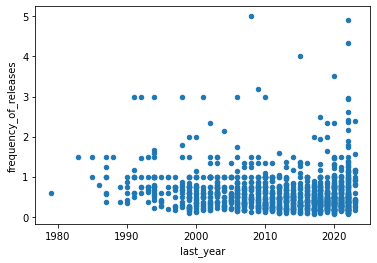

In [67]:
new_df[new_df['type']== 'game'].plot.scatter("last_year", "frequency_of_releases")

<AxesSubplot:xlabel='first_year', ylabel='frequency_of_releases'>

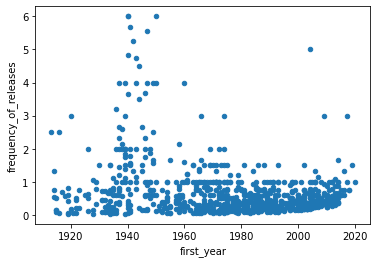

In [68]:
new_df[new_df['type']== 'movie'].plot.scatter("first_year", "frequency_of_releases")

KeyError: 'average_year_gap_per_release'

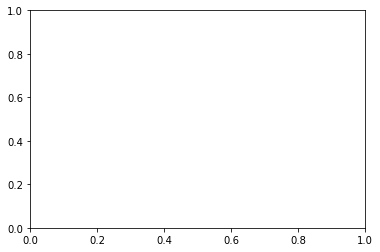

In [69]:
new_df[new_df['type']== 'game'].plot.scatter("franchise_count", "average_year_gap_per_release")

In [70]:
new_df["average_year_gap_per_release"] = new_df.apply(lambda row: row["franchise_length"] / row["franchise_count"], axis = 1)

In [71]:
new_df["average_year_gap_per_release"].describe()

count    2014.000000
mean        2.932124
std         2.742160
min         0.166667
25%         1.333333
50%         2.142857
75%         3.666667
max        31.666667
Name: average_year_gap_per_release, dtype: float64

In [72]:
new_df.frequency_of_releases.describe()

count    2014.000000
mean        0.640364
std         0.650918
min         0.031579
25%         0.272727
50%         0.466667
75%         0.750000
max         6.000000
Name: frequency_of_releases, dtype: float64

<AxesSubplot:xlabel='frequency_of_releases', ylabel='rating'>

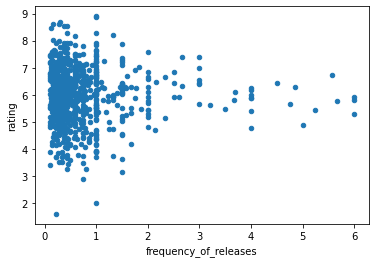

In [73]:
new_df[(new_df['frequency_of_releases']> 0.1) & (new_df["type"] == "movie")].plot.scatter("frequency_of_releases", 'rating')

In [74]:
new_df.sort_values('franchise_length')

,franchise_name,type,rating,votes,franchise_count,first_year,last_year,franchise_length,frequency_of_releases,average_year_gap_per_release
franchise_id,,,,,,,,,,
3025-1911,Burger King,game,4.533333,39.333333,3.0,2006,2006,1,3.000000,0.333333
f487,Tailspin Tommy,movie,5.400000,85.500000,4.0,1939,1939,1,4.000000,0.250000
f924,Free!,movie,7.000000,206.666667,3.0,2017,2017,1,3.000000,0.333333
3025-1620,Small Soldiers,game,7.100000,170.000000,3.0,1998,1998,1,3.000000,0.333333
3025-3610,Arcade Gears,game,6.533333,15.333333,3.0,1991,1991,1,3.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...
f519,Zombi,movie,5.644444,6478.222222,9.0,1915,2012,98,0.091837,10.888889
f1334,Edgar Wallace Mysteries,movie,6.088312,6301.467532,77.0,1923,2023,101,0.762376,1.311688
f1300,Moments of Truth,movie,5.260000,342.200000,5.0,1919,2020,102,0.049020,20.400000


KeyError: 'frequency'

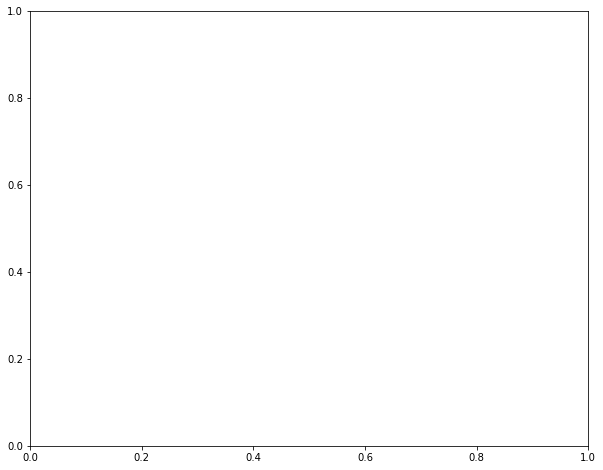

In [75]:
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(
    x=new_df["franchise_length"],
    y=new_df["frequency"],
    c=new_df["rating"],
    cmap="coolwarm",
    alpha=0.7
)

# Add axis labels and a colorbar
ax.set_xlabel("Franchise Length (Years)")
ax.set_ylabel("Frequency")
cbar = fig.colorbar(scatter)
cbar.set_label("Rating")

plt.show()

In [76]:
new_df[new_df['frequency_of_releases']>= 1].sort_values('frequency_of_releases', ascending = False).head(20)

,franchise_name,type,rating,votes,franchise_count,first_year,last_year,franchise_length,frequency_of_releases,average_year_gap_per_release
franchise_id,,,,,,,,,,
f1304,Range Busters,movie,5.916667,73.458333,24.0,1940,1943,4,6.000000,0.166667
f1329,Billy the Kid,movie,5.816667,90.976190,42.0,1940,1946,7,6.000000,0.166667
f646,Shamrock Ellison,movie,5.300000,64.666667,6.0,1950,1950,1,6.000000,0.166667
f71,The Lone Rider,movie,5.770588,40.882353,17.0,1941,1943,3,5.666667,0.176471
f1326,Rocky Lane,movie,6.725641,65.871795,39.0,1947,1953,7,5.571429,0.179487
f1296,Texas Rangers,movie,5.423810,56.666667,21.0,1942,1945,4,5.250000,0.190476
3025-925,Homestar Runner,game,7.920000,30.800000,5.0,2008,2008,1,5.000000,0.200000
f609,Hideshi Hino's Theater of Horror,movie,4.880000,255.600000,5.0,2004,2004,1,5.000000,0.200000
3025-720,Disney,game,6.902778,331.865741,216.0,1979,2022,44,4.909091,0.203704


In [ ]:
df

Now I have this, I can get the average rating and number of votes for each franchise, based on the number of elements in that franchise.

In [77]:
bins =[2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 12.5, 15.5, 20.5, 250]
new_df['franchise_count_bin'] = pd.cut(new_df['franchise_count'],bins=bins, labels=["3", "4", "5", "6", "7", "8", "9", "10", "11-12", "13-15", "16-20", "21+"])

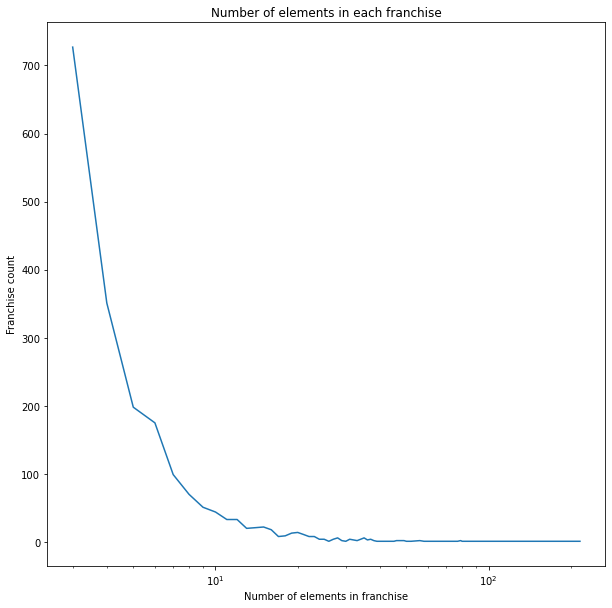

In [78]:
fig, ax = plt.subplots(figsize=(10,10))
new_df['franchise_count'].value_counts().sort_index().plot(title = "Number of elements in each franchise", xlabel = "Number of elements in franchise",ylabel = "Franchise count")
ax.set_xscale("log")

<AxesSubplot:title={'center':'Number of elements in each franchise'}, xlabel='Number of elements in franchise', ylabel='Number of franchises'>

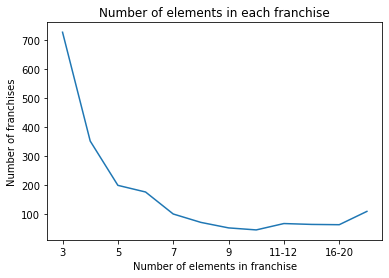

In [79]:
new_df['franchise_count_bin'].value_counts().sort_index().plot(title = "Number of elements in each franchise", xlabel = "Number of elements in franchise",ylabel = "Number of franchises")

In [80]:
bins =[2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 12.5, 15.5, 20.5, 250]
new_df['min_franchise_count'] = pd.cut(new_df['franchise_count'],bins=bins, labels=["3", "4", "5", "6", "7", "8", "9", "10", "11", "13", "16", "21"])

In [81]:
new_df['min_franchise_count'] = new_df['min_franchise_count'].apply(lambda x: int(x))

In [82]:
new_df.sort_values('min_franchise_count')

,franchise_name,type,rating,votes,franchise_count,first_year,last_year,franchise_length,frequency_of_releases,average_year_gap_per_release,franchise_count_bin,min_franchise_count
franchise_id,,,,,,,,,,,,
3025-700,Brain Age,game,6.433333,38.333333,3.0,2005,2012,8,0.375000,2.666667,3,3
3025-2812,Questprobe,game,5.766667,16.333333,3.0,1984,1985,2,1.500000,0.666667,3,3
3025-2817,Akiba's Trip,game,5.733333,25.000000,3.0,2011,2016,6,0.500000,2.000000,3,3
3025-965,SiN,game,7.333333,82.666667,3.0,1998,2006,9,0.333333,3.000000,3,3
3025-2821,Muv-Luv,game,6.966667,18.333333,3.0,2001,2006,6,0.500000,2.000000,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
f1316,Red Ryder,movie,6.455556,58.703704,27.0,1944,1949,6,4.500000,0.222222,21+,21
f1317,Tarzan (1932-1970 series),movie,5.960714,1763.428571,28.0,1932,1970,39,0.717949,1.392857,21+,21
f1320,Carry On,movie,5.922581,3082.000000,31.0,1958,1992,35,0.885714,1.129032,21+,21


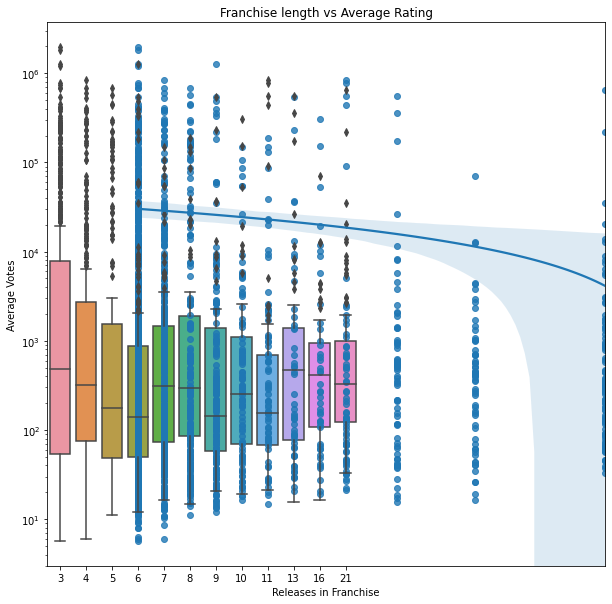

In [86]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(x="min_franchise_count", y="votes", data=new_df, ax=ax)
sns.regplot(x="min_franchise_count", y="votes", data=new_df, ax=ax)
#new_df.boxplot(by = "franchise_count_bin", column = ["rating"], ax = ax)
ax.set_yscale('log')
ax.set_title("Franchise length vs Average Rating")
ax.set_xlabel("Releases in Franchise")

ax.set_ylabel("Average Votes")
plt.show()

In [89]:
new_df.sample()

,franchise_name,type,rating,votes,franchise_count,first_year,last_year,franchise_length,frequency_of_releases,average_year_gap_per_release,franchise_count_bin,min_franchise_count
franchise_id,,,,,,,,,,,,
3025-3987,Value 1500,game,7.7,272.333333,3.0,1993,2020,28,0.107143,9.333333,3,3


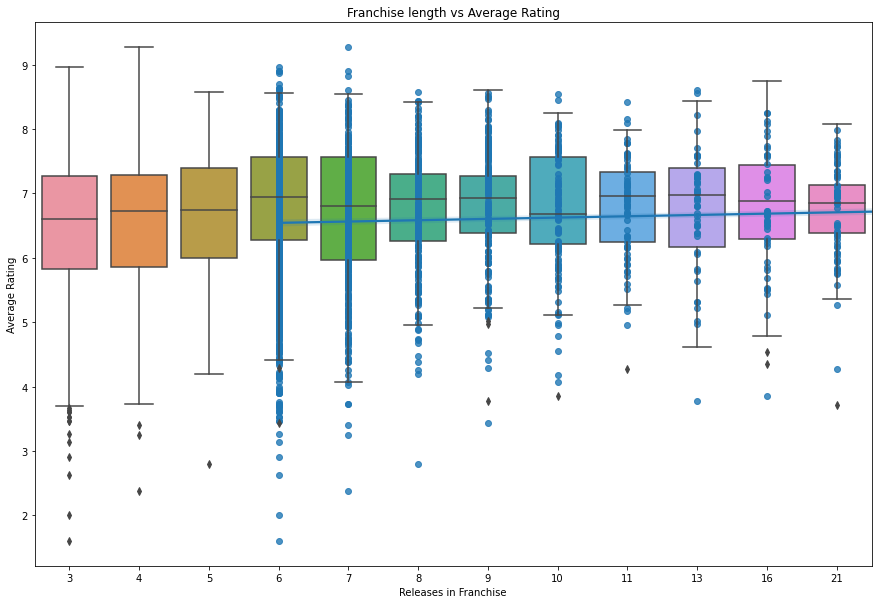

In [88]:
fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x="min_franchise_count", y="rating", data=new_df, ax=ax)
sns.boxplot(x="min_franchise_count", y="rating", data=new_df, ax=ax)

#new_df.boxplot(by = "franchise_count_bin", column = ["rating"], ax = ax)
#ax.set_yscale('log')
ax.set_title("Franchise length vs Average Rating")
ax.set_xlabel("Releases in Franchise")
ax.set_ylabel("Average Rating")
plt.show()

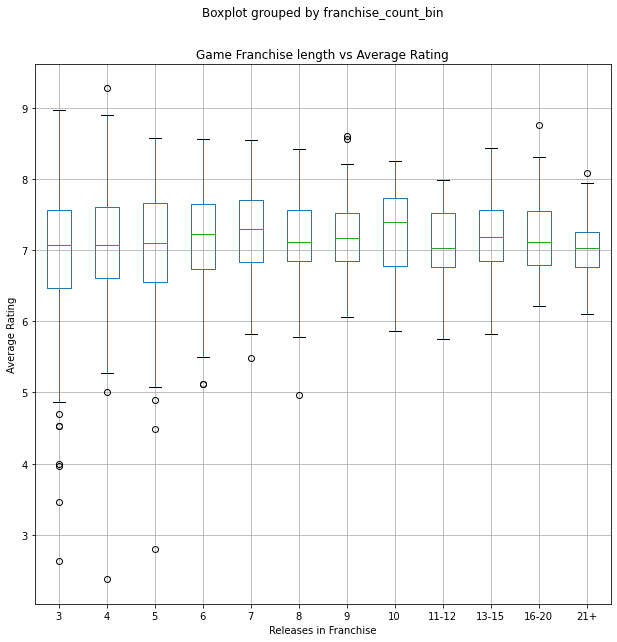

In [119]:
fig, ax = plt.subplots(figsize=(10,10))
new_df[new_df["type"]=="game"].boxplot(by = "franchise_count_bin", column = ["rating"], ax = ax)
#ax.set_yscale('log')
ax.set_title("Game Franchise length vs Average Rating")
ax.set_xlabel("Releases in Franchise")
ax.set_ylabel("Average Rating")
plt.show()

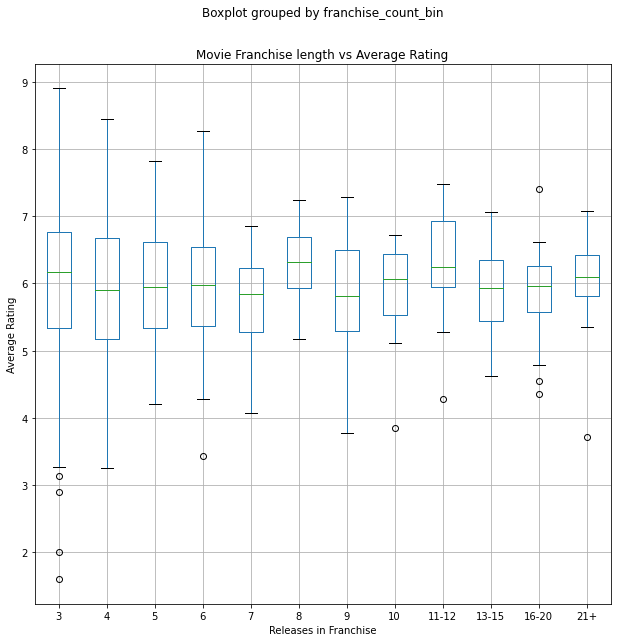

In [120]:
fig, ax = plt.subplots(figsize=(10,10))
new_df[new_df["type"]=="movie"].boxplot(by = "franchise_count_bin", column = ["rating"], ax = ax)
#ax.set_yscale('log')
ax.set_title("Movie Franchise length vs Average Rating")
ax.set_xlabel("Releases in Franchise")
ax.set_ylabel("Average Rating")
plt.show()

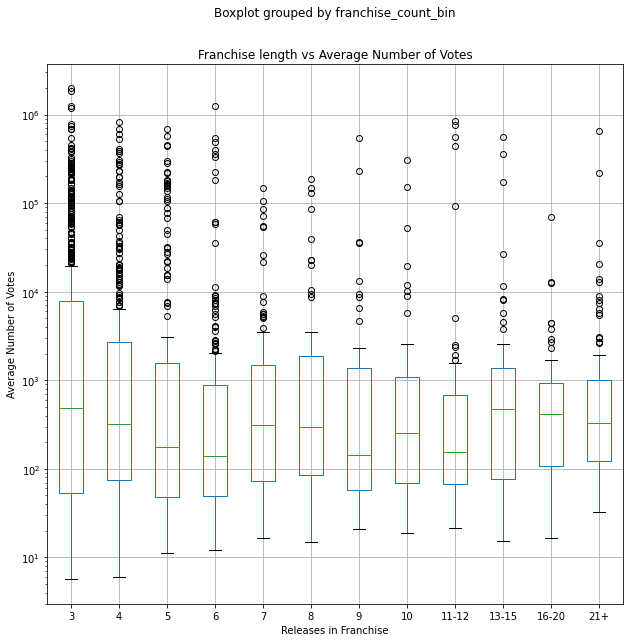

In [121]:
fig, ax = plt.subplots(figsize=(10,10))
new_df.boxplot(by = "franchise_count_bin", column = ["votes"], ax = ax)
ax.set_yscale('log')
ax.set_title("Franchise length vs Average Number of Votes")
ax.set_xlabel("Releases in Franchise")
ax.set_ylabel("Average Number of Votes")
plt.show()

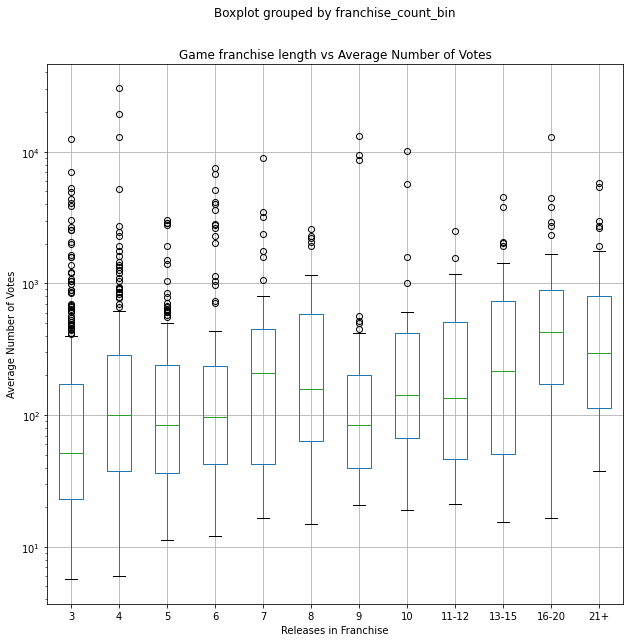

In [122]:
fig, ax = plt.subplots(figsize=(10,10))
new_df[new_df["type"]=="game"].boxplot(by = "franchise_count_bin", column = ["votes"], ax = ax)
ax.set_yscale('log')
ax.set_title("Game franchise length vs Average Number of Votes")
ax.set_xlabel("Releases in Franchise")
ax.set_ylabel("Average Number of Votes")
plt.show()

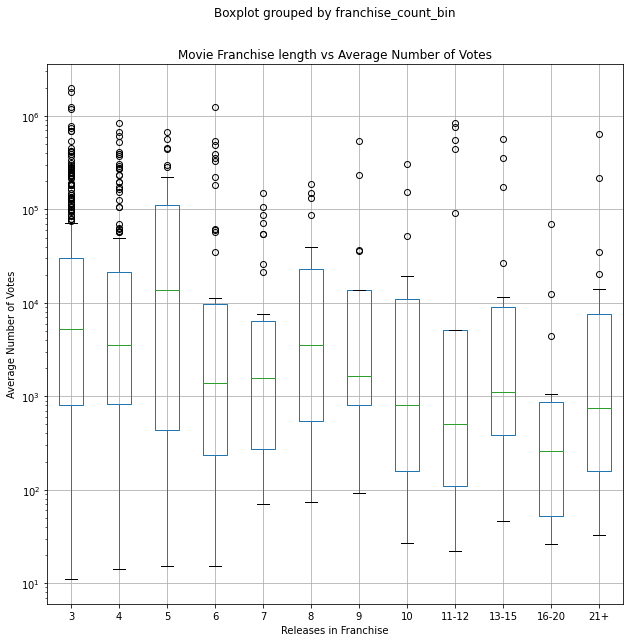

In [123]:
fig, ax = plt.subplots(figsize=(10,10))
new_df[new_df["type"]=="movie"].boxplot(by = "franchise_count_bin", column = ["votes"], ax = ax)
ax.set_yscale('log')
ax.set_title("Movie Franchise length vs Average Number of Votes")
ax.set_xlabel("Releases in Franchise")
ax.set_ylabel("Average Number of Votes")
plt.show()

<AxesSubplot:title={'center':'votes'}, xlabel='franchise_count_bin'>

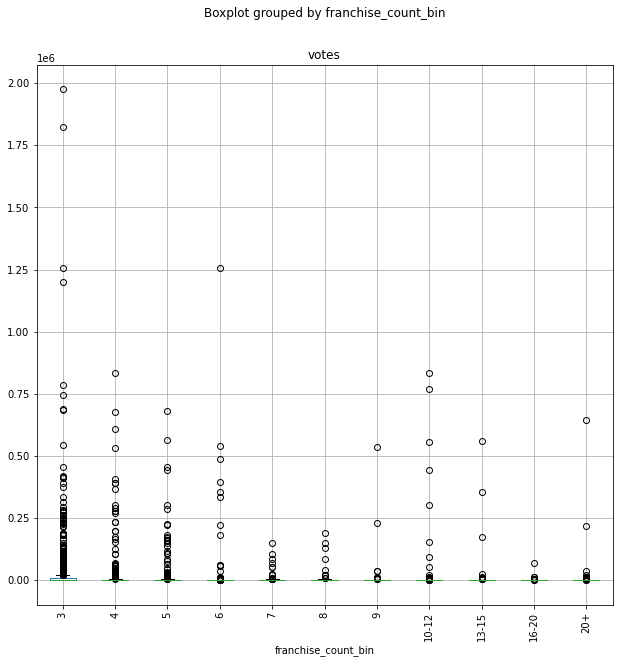

In [49]:
new_df.boxplot(by = "franchise_count_bin", column = ["votes"], rot = 90, figsize=(10,10))

In [125]:
df.sample()

,franchise_name,franchise_id,type,tconst,title,year,is_adult,runtime,genres,votes_average,rating_average,franchise_count,content_per_year,year_diff,vote_diff,rating_diff,num_of_releases_diff,z_rating,z_votes,franchise_count_bin
5815,Valkyrie Profile,3025-599,game,tt1322399,Valkyrie Profile: Covenant of the Plume,2008,0,NaN,"["" 'Strategy']"", "" 'Action'"", ""['\\\\N'"", "" 'R...",11.0,7.3,4.0,1.0,2.0,-104.0,-0.4,0.0,0.185321,-0.254494,4


In [49]:
# Merge the mean ratings back into the original DataFrame
df_unmerged = pd.merge(df_unmerged, df_unmerged.groupby("franchise_id")["rating"].mean().reset_index(), on="franchise_id", suffixes=("", "_franchise_overall"))

# Rename the new column to "franchise_overall_rating"
#df_unmerged = df_unmerged.rename(columns={"rating_mean": "franchise_overall_rating"})


#df_unmerged["franchise_overall_rating"] = df_unmerged.groupby("franchise_id")["rating"].mean()

In [61]:
df_unmerged.groupby('franchise_id')['rating_franchise_overall'].first().value_counts().sort_index()

1.600000    1
2.000000    1
2.375000    1
2.633333    1
2.800000    1
           ..
8.825000    1
8.866667    1
8.900000    3
8.966667    1
9.275000    1
Name: rating_franchise_overall, Length: 1037, dtype: int64

In [172]:
df.sample()

,franchise_name,franchise_id,type,tconst,title,year,is_adult,runtime,genres,votes_average,rating_average,franchise_count,content_per_year,year_diff,vote_diff,rating_diff,num_of_releases_diff,z_rating,z_votes,franchise_count_bin
10259,Homunculus,f612,movie,"tt0007240, tt0130005","homunculus, 4. teil - die rache des homunculus...",1917,0,68,"['\\N', 'Drama', 'Sci-Fi']",31.0,6.35,5.0,2.0,1.0,-18.333333,-0.116667,-1.0,0.29066,-0.331215,5


In [150]:
#bins =[1, 2.01, 3.01, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 12.5, 15.5, 20.5, 250]
df_unmerged['overall_franchise_rating_bins'] = pd.cut(df_unmerged['rating_franchise_overall'], bins=10)

KeyError: 'rating_franchise_overall'

In [149]:
df_unmerged.groupby('franchise_id')['overall_franchise_rating_bins'].first().value_counts().sort_index().plot(
    kind='bar', x='index', y='rating_franchise_overall', xlabel = "Number of releases", ylabel = "Number of franchises", legend=False)

KeyError: 'Column not found: overall_franchise_rating_bins'

In [61]:
df.sort_values("votes_average")

,franchise_name,franchise_id,type,tconst,title,year,is_adult,runtime,genres,votes_average,rating_average,franchise_count,content_per_year,year_diff,vote_diff,rating_diff,num_of_releases_diff,z_rating,z_votes,franchise_count_bins
893,The Adventures of Tintin,3025-1386,game,tt11587470,Tintin au Tibet,1995,0,NaN,""" Action-Adventure"","" Platformer"",""Adventure""",5.0,6.2,4.0,1.0,NaN,NaN,NaN,NaN,-0.836352,-0.257039,"(3.9, 4.9]"
3578,Gal Gun,3025-3335,game,tt3688036,Galgun,2011,0,NaN,"""Light-Gun Shooter"","" Action""",5.0,4.8,3.0,1.0,NaN,NaN,NaN,NaN,-2.136662,-0.257039,"(2.9, 3.9]"
492,X-COM,3025-120,game,tt15229276,X-COM: Apocalypse,1997,0,NaN,""" Action"","" Sci-Fi"","" Thriller"",""Strategy""",5.0,7.2,8.0,1.0,2.0,-66.0,-0.7,0.0,0.092441,-0.257039,"(7.9, 8.9]"
3700,BoxBoy!,3025-3471,game,tt9739766,Bye-Bye! BoxBoy!,2017,0,NaN,"""Puzzle"","" Platformer"","" Adventure""",5.0,7.6,3.0,1.0,2.0,-5.0,0.9,0.0,0.463959,-0.257039,"(2.9, 3.9]"
3936,The Jackbox Party Pack,3025-3716,game,tt26546575,The Jackbox Party Pack 5,2018,0,NaN,""" Minigame Collection"","" Trivia/Board Game"",""\...",5.0,7.8,5.0,1.0,2.0,-20.0,-0.1,0.0,0.649717,-0.257039,"(4.9, 5.9]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11249,The Godfather,f942,movie,tt0068646,the godfather,1972,0,175,"Crime,Drama",1896247.0,9.2,3.0,1.0,NaN,NaN,NaN,NaN,2.763791,10.096842,"(2.9, 3.9]"
10321,Middle-earth,f630,movie,tt0120737,the lord of the rings: the fellowship of the ring,2001,0,178,"Action,Adventure,Drama",1905459.0,8.8,6.0,1.0,NaN,NaN,NaN,NaN,2.416685,10.147503,"(5.9, 6.9]"
7433,The Lord of the Rings,f1045,movie,tt0120737,the lord of the rings: the fellowship of the ring,2001,0,178,"Action,Adventure,Drama",1905459.0,8.8,3.0,1.0,NaN,NaN,NaN,NaN,2.416685,10.147503,"(2.9, 3.9]"
9471,The Matrix,f406,movie,tt0133093,the matrix,1999,0,136,"Action,Sci-Fi",1945793.0,8.7,4.0,1.0,NaN,NaN,NaN,NaN,2.329908,10.369316,"(3.9, 4.9]"


In [49]:
df["z_votes"].describe()

count    1.138300e+04
mean    -1.754139e-17
std      1.000044e+00
min     -3.313579e-01
25%     -2.800044e-01
50%     -2.400771e-01
75%     -1.450921e-01
max      2.931764e+01
Name: z_votes, dtype: float64

<AxesSubplot:>

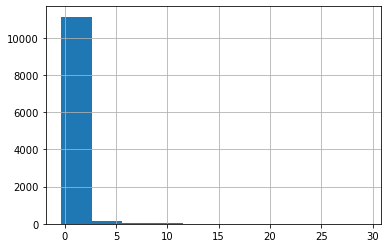

In [60]:
df.z_votes.hist()

(-4.0, 4.0)

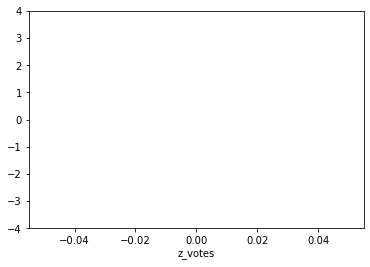

In [53]:
sns.lineplot(x = df["z_votes"])
plt.ylim(-4, 4)

<AxesSubplot:>

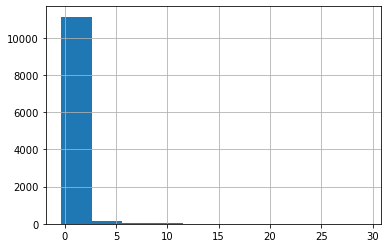

In [45]:
df.z_votes.hist()

In [69]:
df[df["type"]=="game"].franchise_id.nunique()

1157

In [64]:
df[df["type"]=="game"].franchise_count_bins.value_counts()

(12.9, 250.0]    2752
(2.9, 3.9]        938
(3.9, 4.9]        736
(5.9, 6.9]        657
(4.9, 5.9]        592
(6.9, 7.9]        383
(7.9, 8.9]        319
(8.9, 9.9]        270
(9.9, 10.9]       231
(10.9, 11.9]      217
(11.9, 12.9]      210
Name: franchise_count_bins, dtype: int64

<AxesSubplot:title={'center':'rating_average'}, xlabel='franchise_count_bins'>

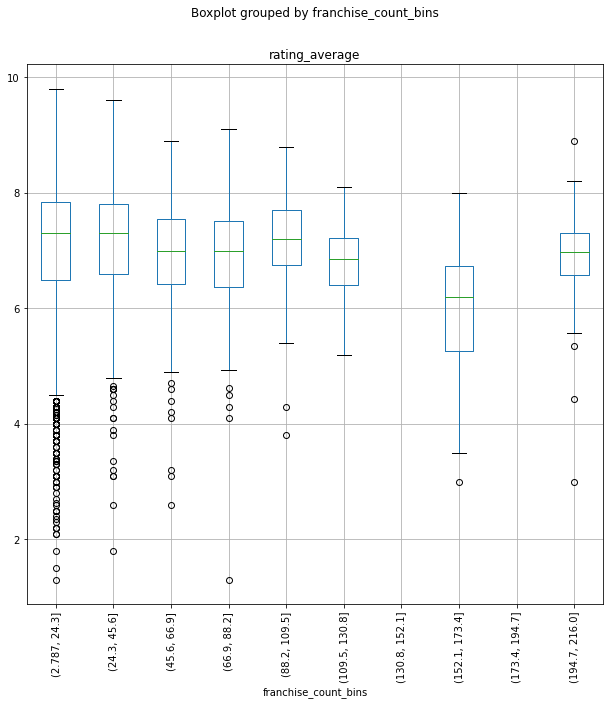

In [10]:
df[df["type"]=="game"].boxplot(by = "franchise_count_bins", column = ["rating_average"], rot = 90, figsize=(10,10))

In [ ]:
df.plot.bar(x = df.rating_average)

In [46]:
df.loc[df["type"] == "movie", 'z_rating'] = stats.zscore(df.loc[df["type"] == "movie", 'rating_average'])
df.loc[df["type"] == "game", 'z_rating'] = stats.zscore(df.loc[df["type"] == "game", 'rating_average'])
df.loc[df["type"] == "movie", 'z_votes'] = stats.zscore(df.loc[df["type"] == "movie", 'votes_average'])
df.loc[df["type"] == "game", 'z_votes'] = stats.zscore(df.loc[df["type"] == "game", 'votes_average'])

In [ ]:
df

Getting an overall picture of our data:

In [ ]:
df[df["type"] == "game"].votes_average.describe()

In [ ]:
df[df["type"] == "movie"].votes_average.describe()

In [ ]:
df.rating_average.describe()

In [ ]:
#df.groupby("type").year_diff.boxplot(rot = 90)
#df.groupby("type")[["year_diff"]].boxplot(rot=90)
df.groupby("type").plot(kind="box", rot=90)


In [ ]:
The average re

In [ ]:
df[df["type"]== "movie"]